In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('/kaggle/input/ufc-fighters-statistics/ufc-fighters-statistics.csv')

In [5]:
df.head(2)

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.0,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.0,0.0,0.00,0.0,100.0,21.6


In [6]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


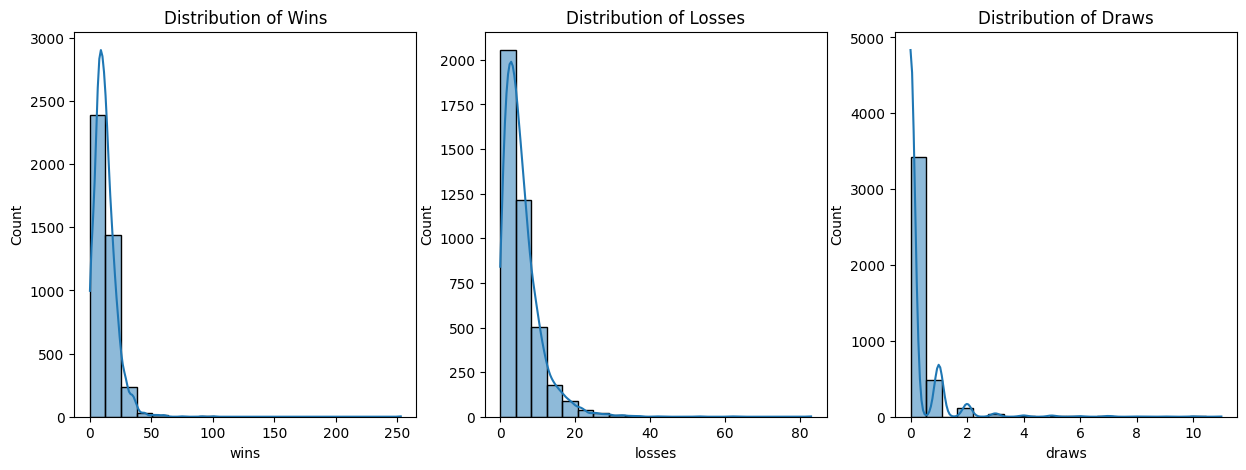

In [7]:
# Distribution of wins, losses, and draws
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['wins'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Wins')
sns.histplot(df['losses'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Losses')
sns.histplot(df['draws'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Draws')
plt.show()

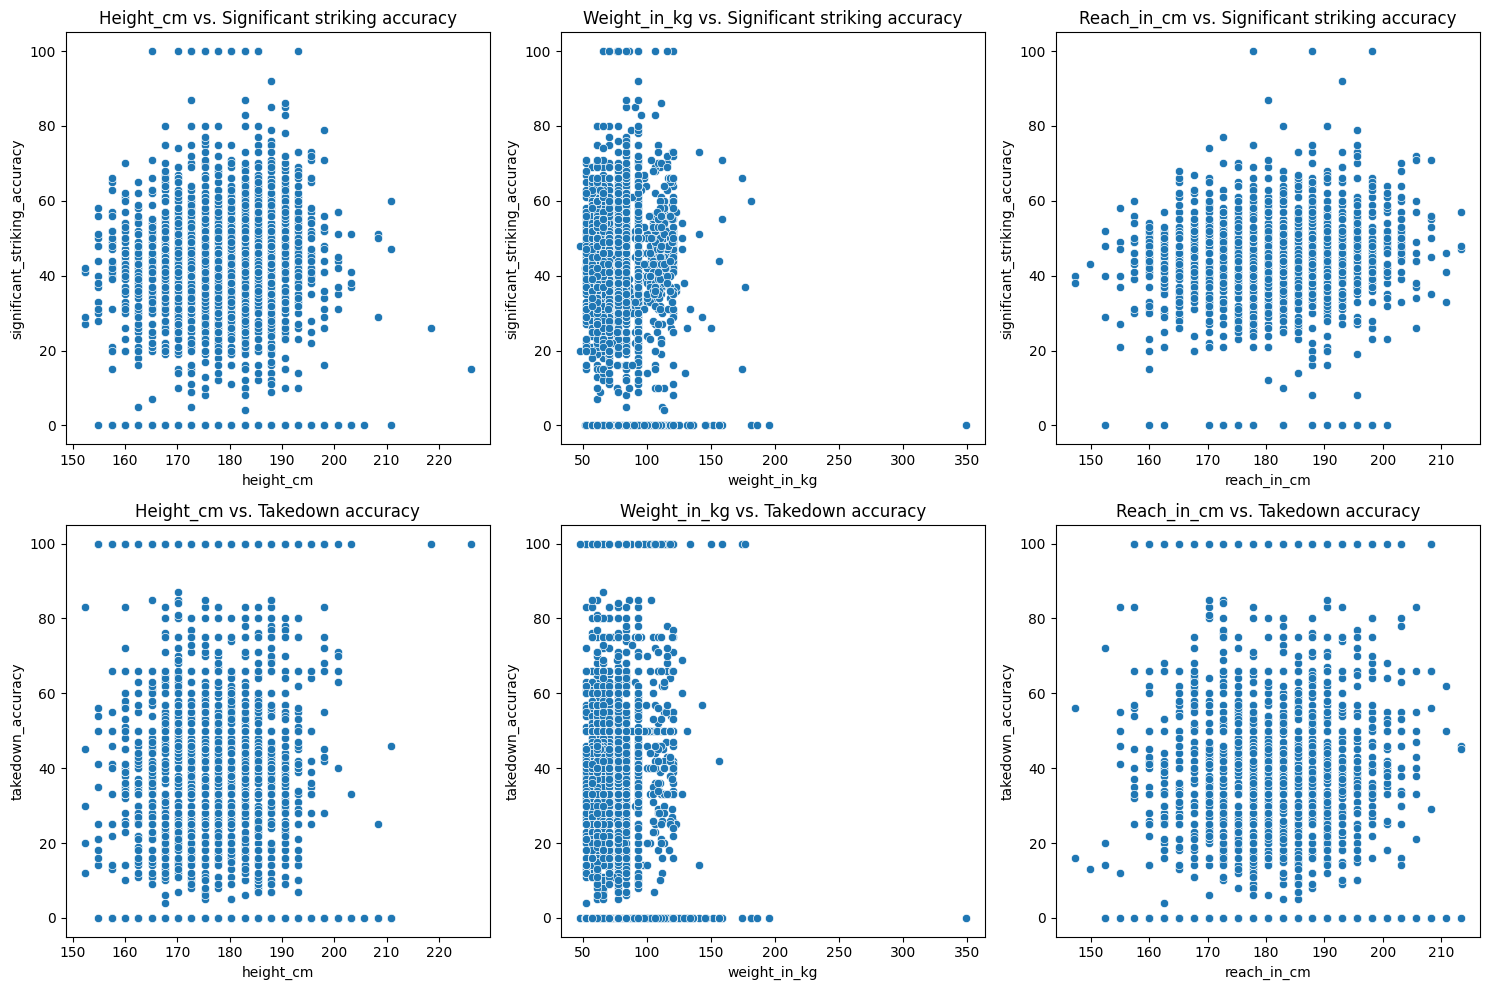

In [9]:
# Relationship between physical attributes and fighting performance
attributes = ['height_cm', 'weight_in_kg', 'reach_in_cm']
performance_metrics = ['significant_striking_accuracy', 'takedown_accuracy']

fig, axes = plt.subplots(len(performance_metrics), len(attributes), figsize=(15, 10))

for i, metric in enumerate(performance_metrics):
    for j, attribute in enumerate(attributes):
        sns.scatterplot(x=attribute, y=metric, data=df, ax=axes[i, j])
        axes[i, j].set_title(f'{attribute.capitalize()} vs. {metric.replace("_", " ").capitalize()}')

plt.tight_layout()
plt.show()

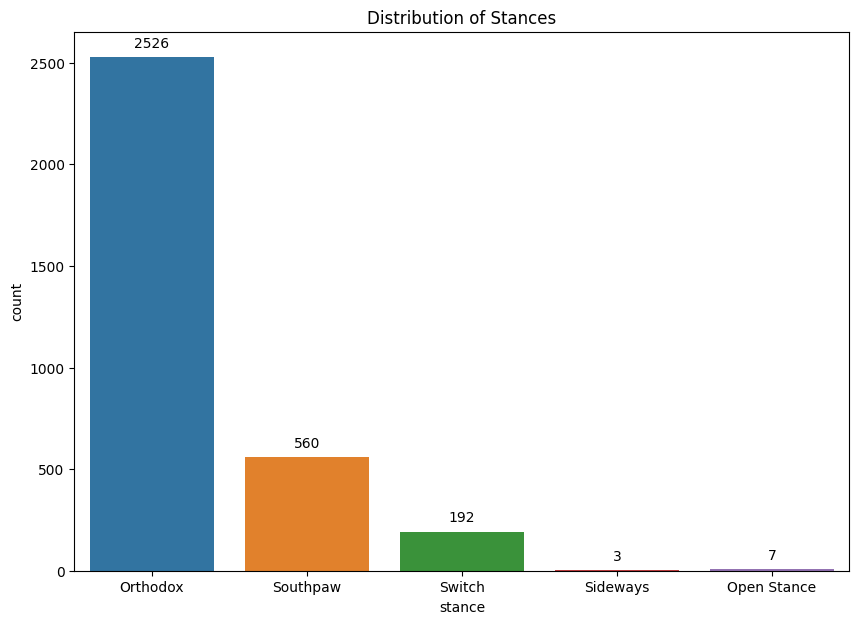

In [12]:
# Stance distribution
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='stance', data=df)
plt.title('Distribution of Stances')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

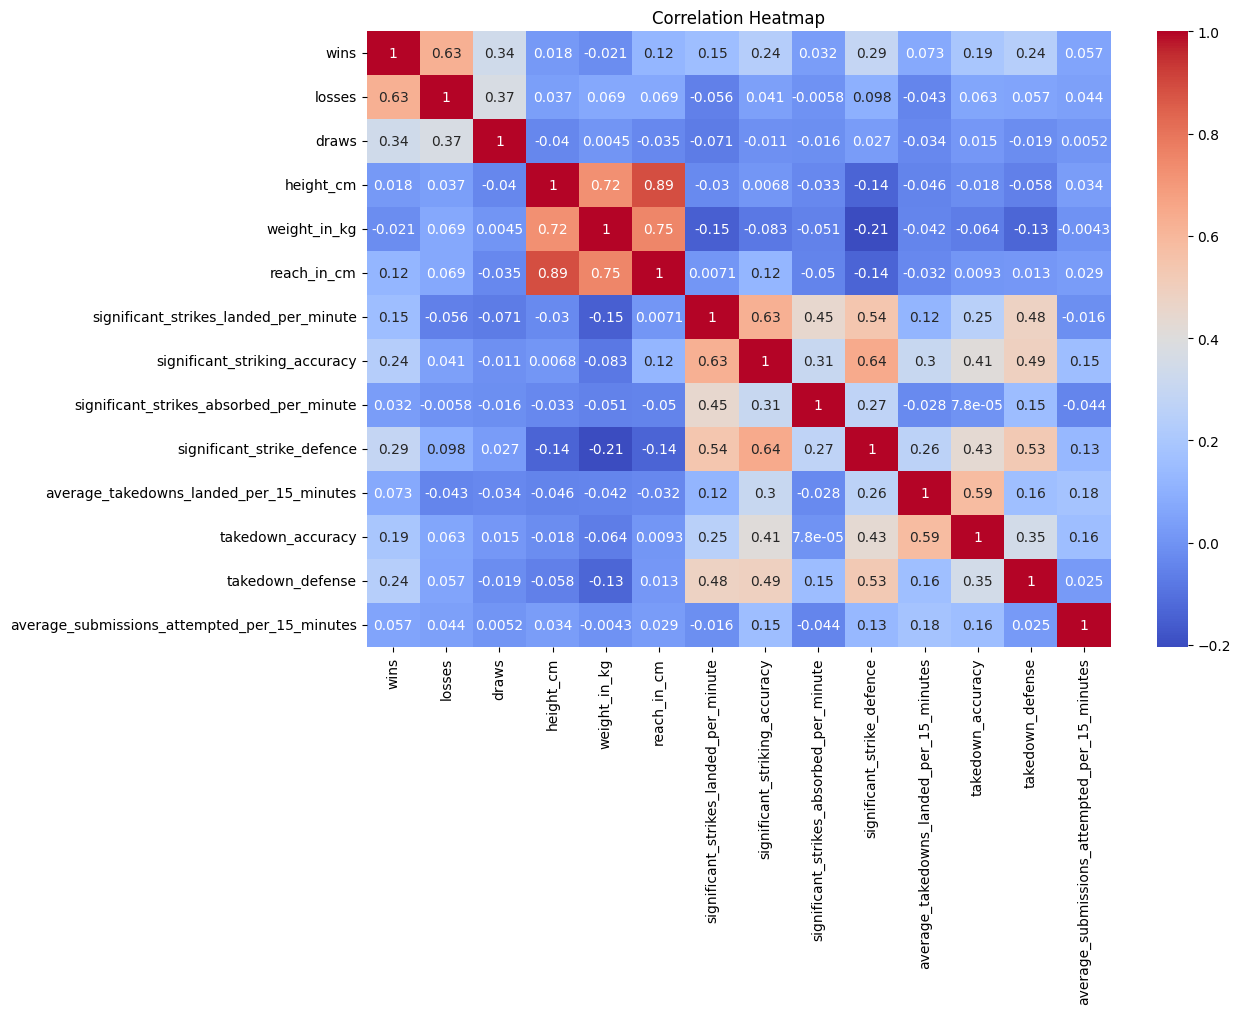

In [14]:
# Selecting only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# Visualizing average takedowns landed per 15 minutes
fig = px.histogram(df, x='average_takedowns_landed_per_15_minutes', nbins=30,
                   title='Distribution of Average Takedowns Landed per 15 Minutes')
fig.show()